In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

df = pd.read_csv("TMeURO.csv") 

print(df.head())
print("\nShape:", df.shape)
print("\nData types:")
print(df.dtypes)


   order_id product     category     price  quantity payment_method  \
0         1   Watch  Electronics  12652.30         4      Easypaisa   
1         2     Bag      Fashion  20053.64         2    Credit Card   
2         3   Shoes      Fashion  13274.17         2       JazzCash   
3         4     Bag  Electronics  15332.08         1            COD   
4         5     Bag  Accessories  23165.07         1     Debit Card   

         date     total    Month  Discount  City Code  Order Priority Code  \
0  01/01/2023  50609.20  January       0.0        1.0                  2.0   
1  02/01/2023  40107.28  January       0.1        1.0                  2.0   
2  03/01/2023  26548.34  January       0.1        1.0                  2.0   
3  04/01/2023  15332.08  January       0.1        1.0                  2.0   
4  05/01/2023  23165.07  January       0.0        1.0                  NaN   

   Latitude  Longtitude  
0       1.0         0.0  
1       1.0         0.0  
2       1.0         0.0  


In [8]:
df["date"] = pd.to_datetime(df["date"], format="%d/%m/%Y", errors="coerce")
colsdrop = []
for col in ["Latitude", "Longtitude"]:
    if col in df.columns:
        colsdrop.append(col)

print("\nDropping columns:", colsdrop)
df.drop(columns=colsdrop, inplace=True)



Dropping columns: ['Latitude', 'Longtitude']


In [9]:
rename_map = {}
if "City Code" in df.columns:
    rename_map["City Code"] = "City"
if "Order Priority Code" in df.columns:
    rename_map["Order Priority Code"] = "Order Priority"

df.rename(columns=rename_map, inplace=True)

print("\nColumns after renaming:")
print(df.columns)



Columns after renaming:
Index(['order_id', 'product', 'category', 'price', 'quantity',
       'payment_method', 'date', 'total', 'Month', 'Discount', 'City',
       'Order Priority'],
      dtype='object')


In [10]:
duplicate = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate}")

# 6. DROP DUPLICATE RECORDS
if duplicate > 0:
    df = df.drop_duplicates()
    print("Duplicates dropped.")
    print("New shape:", df.shape)


Number of duplicate rows: 6
Duplicates dropped.
New shape: (500, 12)


In [13]:
print("\nMissing values per column:")
print(df.isna().sum())

numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

for col in numeric_cols:
    if df[col].isna().sum() > 0:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)

for col in categorical_cols:
    if df[col].isna().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)

print("\nMissing values after filling:")
print(df.isna().sum())



Missing values per column:
order_id          0
product           0
category          0
price             0
quantity          0
payment_method    0
date              0
total             0
Month             0
Discount          0
City              0
Order Priority    0
dtype: int64

Missing values after filling:
order_id          0
product           0
category          0
price             0
quantity          0
payment_method    0
date              0
total             0
Month             0
Discount          0
City              0
Order Priority    0
dtype: int64


In [14]:
city_map = {
    1: "Karachi",
    2: "Lahore",
    3: "Islamabad",
    4: "Faisalabad",
    5: "Quetta",
    6: "Peshawar"
}

if "City" in df.columns:
    df["City"] = df["City"].round().map(city_map)

priority_map = {
    0: "LOW",
    1: "MEDIUM",
    2: "HIGH",
    3: "CRITICAL"
}

if "Order Priority" in df.columns:
    df["Order Priority"] = df["Order Priority"].round().map(priority_map)



Top 5 products by total sales:
product
Headphones    9414259.95
Watch         9295181.97
Mobile        8478520.28
Shoes         8304435.17
Laptop        7908062.14
Name: total, dtype: float64


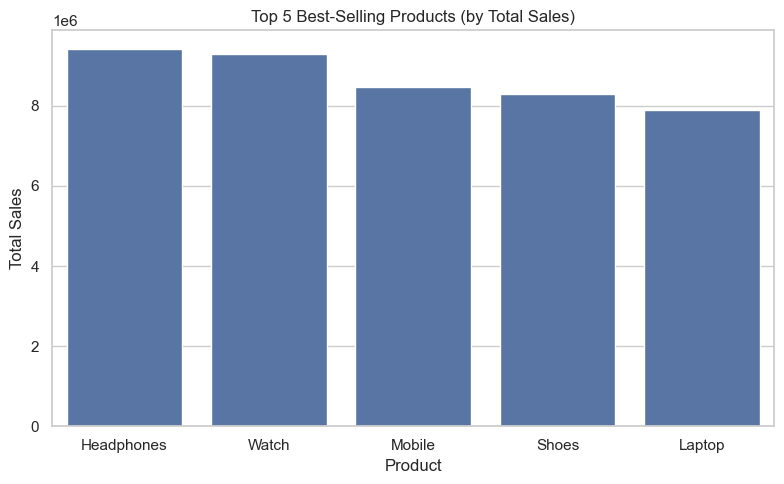

In [15]:
#1- Best selling products
top_products = (
    df.groupby("product")["total"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)
print("\nTop 5 products by total sales:")
print(top_products)

plt.figure(figsize=(8, 5))
sns.barplot(
    x=top_products.index,
    y=top_products.values
)
plt.title("Top 5 Best-Selling Products (by Total Sales)")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


Payment method counts:
payment_method
JazzCash       112
Credit Card    107
Easypaisa      105
COD             97
Debit Card      79
Name: count, dtype: int64


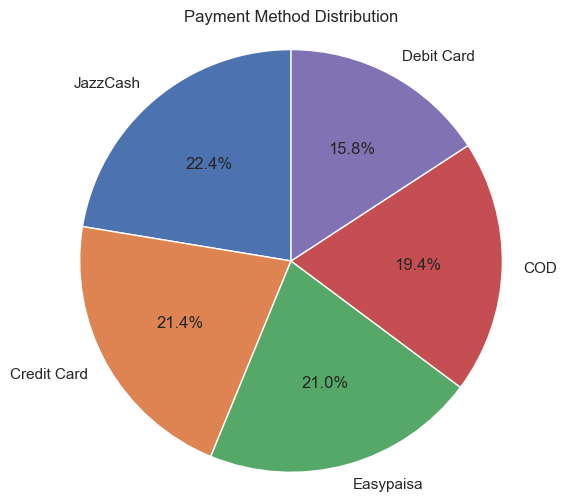

In [22]:
#2 Payment method
payment_counts = df["payment_method"].value_counts()
print("\nPayment method counts:")
print(payment_counts)

plt.figure(figsize=(6, 6))
plt.pie(
    payment_counts.values,
    labels=payment_counts.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Payment Method Distribution")
plt.axis("equal")  # Equal aspect ratio for a perfect circle
plt.show()



Month-wise total sales:
Month
January      6238414.59
February     5545040.22
March        6711119.66
April        6275753.74
May          5909845.92
June         2860920.11
July         2688475.62
August       2557288.54
September    2515916.08
October      3139444.82
November     2805153.37
December     3952563.75
Name: total, dtype: float64


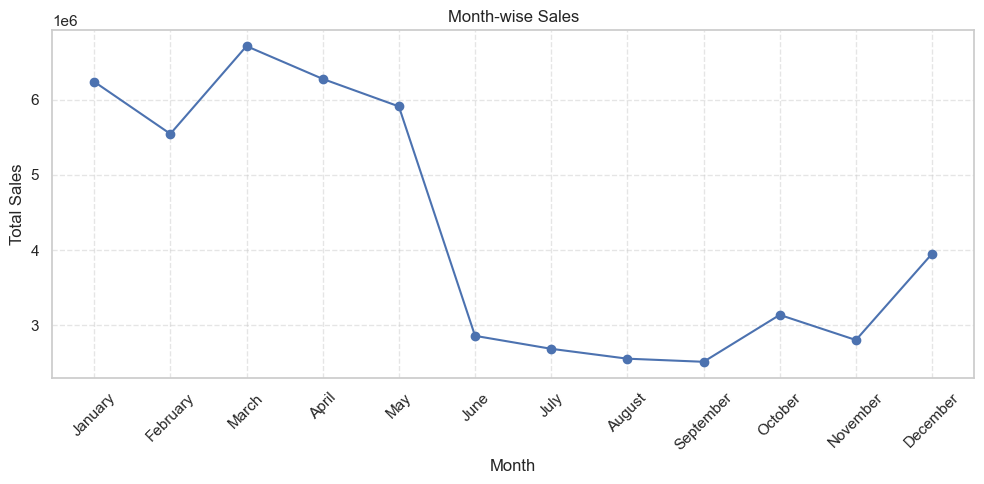

In [23]:
#3- Month wise ssales
month_sales = df.groupby("Month")["total"].sum()

# Ensure proper calendar month order
month_order = [
    "January", "February", "March", "April",
    "May", "June", "July", "August",
    "September", "October", "November", "December"
]
month_sales = month_sales.reindex(month_order)

print("\nMonth-wise total sales:")
print(month_sales)

plt.figure(figsize=(10, 5))
plt.plot(month_sales.index, month_sales.values, marker="o")
plt.title("Month-wise Sales")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()



City-wise total sales:
         City        total
0     Karachi   5060916.14
1    Peshawar   6194016.19
2  Faisalabad   6318998.97
3   Islamabad   9472379.53
4      Quetta   9488620.43
5      Lahore  14665005.16


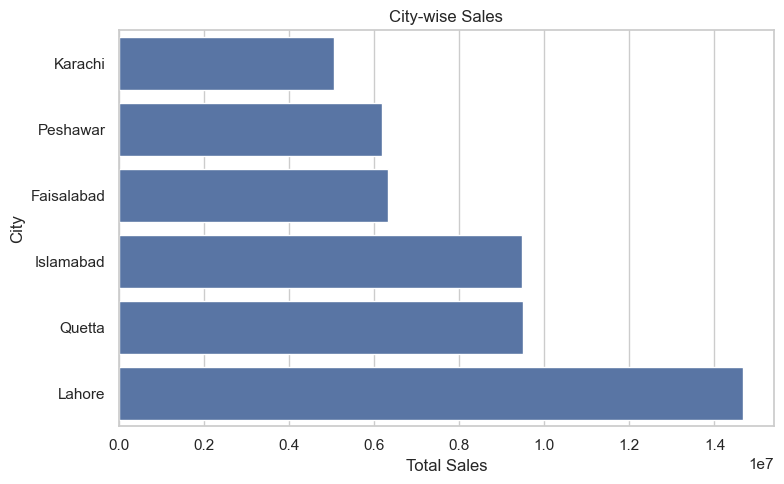

In [24]:
#4 City wise sales
city_sales = (
    df.groupby("City")["total"]
    .sum()
    .sort_values(ascending=True) 
    .reset_index()
)

print("\nCity-wise total sales:")
print(city_sales)

plt.figure(figsize=(8, 5))
sns.barplot(
    y="City",
    x="total",
    data=city_sales
)
plt.title("City-wise Sales")
plt.xlabel("Total Sales")
plt.ylabel("City")
plt.tight_layout()
plt.show()



Month-wise sales by category:
category   Accessories  Electronics     Fashion
Month                                          
January     2745729.82   1855039.15  1637645.62
February    1178881.69   1929360.80  2436797.73
March       2749630.71   2457415.74  1504073.21
April       2387980.38   2265079.20  1622694.16
May         1240740.21   2352232.89  2316872.82
June        1421673.13    657353.10   781893.88
July         961408.72   1218489.97   508576.93
August       521529.94    881950.11  1153808.49
September    849152.91    952931.97   713831.20
October      496080.70   1911295.72   732068.40
November     739060.88    991960.56  1074131.93
December    1005459.07   1460885.05  1486219.63


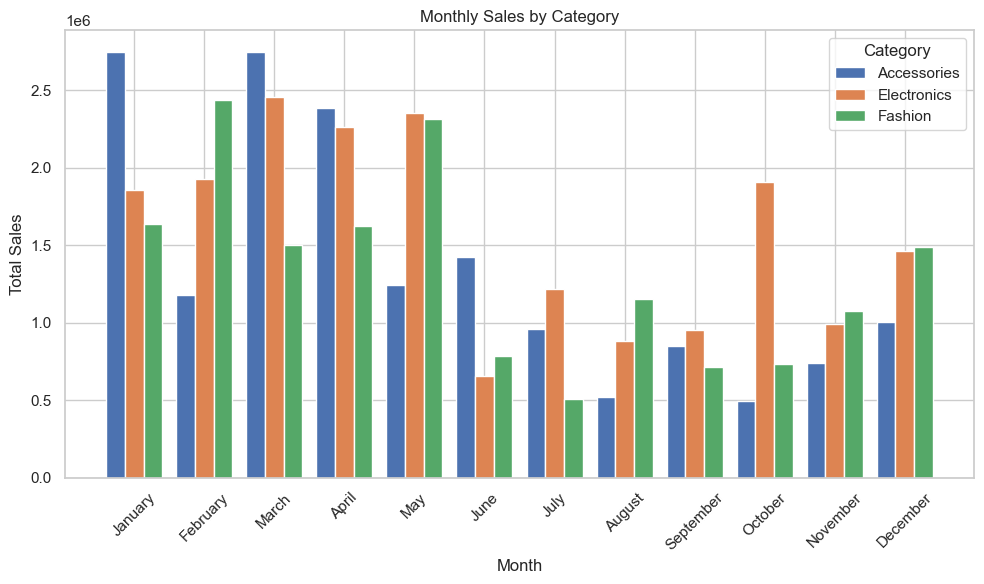

In [25]:
#5 sales by month
month_cat = (
    df.pivot_table(
        index="Month",
        columns="category",
        values="total",
        aggfunc="sum"
    )
    .reindex(month_order)
)

print("\nMonth-wise sales by category:")
print(month_cat)

# Create side-by-side bars
plt.figure(figsize=(10, 6))
x = np.arange(len(month_cat.index)) 
categories = list(month_cat.columns)
width = 0.8 / len(categories)       

for i, cat in enumerate(categories):
    plt.bar(
        x + i * width,
        month_cat[cat],
        width=width,
        label=cat
    )

plt.title("Monthly Sales by Category")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(x + width * (len(categories) - 1) / 2, month_cat.index, rotation=45)
plt.legend(title="Category")
plt.tight_layout()
plt.show()

1- Watches are the top-selling product, followed closely by Headphones and Mobiles indicating strong demand for key electronics.
2- JazzCash and Credit Card are the most frequently used payment methods, so optimizing promotions and checkout experience for these methods can improve conversions.
3- Sales are strongest in the first half of the year, especially in January, March, and April showing clear seasonal peaks.
4- Lahore and Quetta generate the highest city-level revenue, while Karachi and Peshawar lag slightly suggesting room for targeted marketing or logistics improvements there.
5- Accessories consistently contribute a large share of revenue across many months, while Electronics also perform well, so focusing on these categories can drive overall sales growth.
